In [1]:
import os
import numpy as np
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
sift = cv2.xfeatures2d.SIFT_create()

In [2]:
data_dir = "C:\\Users\\OliTh\\OneDrive - University of Warwick\\cs933\\Coursework\\final files\\output1\\"
results_dir = data_dir

num_classes = 300

images = []
classes = []
            
# load images output from task 1 into images array
    
for label in range(num_classes):

    # e.g. obj10_1.png is image 1 and has label 10
    directory = data_dir + 'obj' + str(label+1).rjust(3,'0') + '_*.jpg'
    
    filenames = glob.glob(directory)

    for j in range(len(filenames)):
        
        im = plt.imread(filenames[j])
        
        images.append(im)
        classes.append(label+1)

In [3]:
# load images output from task 1 train-001.jpg into unknown_images array

unknown_images = []

directory = data_dir + 'objxxx' + '_*.jpg'
filenames = glob.glob(directory)
for i in range(len(filenames)):
    unknown_images.append(plt.imread(filenames[i]))

In [4]:
# classes array gives the card id of a card in the images array based on it's index
print(classes)

[1, 1, 2, 4, 5, 5, 7, 11, 11, 11, 15, 15, 17, 17, 18, 18, 21, 24, 24, 25, 25, 26, 26, 28, 31, 31, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 36, 36, 36, 37, 40, 40, 42, 44, 45, 47, 47, 48, 48, 52, 52, 52, 52, 54, 54, 54, 54, 54, 54, 54, 56, 56, 57, 57, 57, 57, 57, 57, 59, 60, 60, 62, 63, 63, 63, 63, 63, 63, 65, 65, 66, 66, 67, 67, 68, 68, 68, 68, 69, 73, 73, 76, 76, 82, 83, 83, 87, 89, 89, 89, 89, 92, 96, 96, 98, 101, 103, 104, 104, 106, 106, 108, 108, 109, 109, 109, 111, 112, 112, 112, 114, 114, 114, 115, 119, 120, 121, 121, 121, 124, 125, 127, 127, 129, 131, 133, 133, 134, 134, 135, 135, 136, 136, 138, 139, 139, 139, 139, 139, 139, 142, 142, 146, 146, 146, 147, 147, 148, 150, 150, 151, 151, 154, 154, 156, 156, 160, 161, 162, 162, 164, 165, 168, 168, 168, 170, 171, 172, 172, 174, 174, 177, 181, 181, 181, 182, 182, 182, 183, 184, 186, 187, 189, 189, 190, 190, 191, 192, 192, 192, 193, 196, 198, 198, 198, 210, 210]


In [5]:
np_classes = np.array(classes)
unique, counts = np.unique(np_classes, return_counts=True)
print(len(classes))
print(len(unique))
print(len(unique)/len(classes))

209
104
0.49760765550239233


In [6]:
def index_finder(id_num):
    index_list = np.where(np_classes == id_num)
    return index_list[0]

def class_finder(index):
    return classes[index]

Method matching images uising colour histograms. Mean squared error methods are used compare features. I found this method to be very unsuccessful.

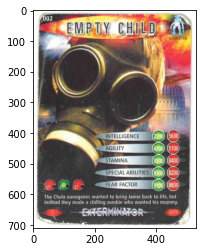

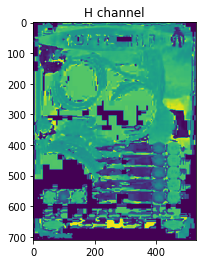

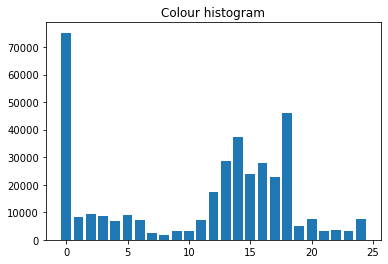

In [7]:
hsv = cv2.cvtColor(images[2], cv2.COLOR_BGR2HSV)

plt.imshow(images[2])
plt.show()

plt.imshow(hsv[:,:,0]) # channel 0 is the H or Hue channel
plt.title('H channel')
plt.show()

hsv_hist, bin_edges = np.histogram(hsv[:,:,0], bins=25)

plt.bar(np.arange(hsv_hist.shape[0]), hsv_hist)
plt.title('Colour histogram')
plt.show()

In [8]:
features = []

for image in images:
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_hist, bin_edges = np.histogram(hsv[:,:,0], bins=25)
    hsv_hist[0]=0 # remove the 0 bin
    features.append(hsv_hist)

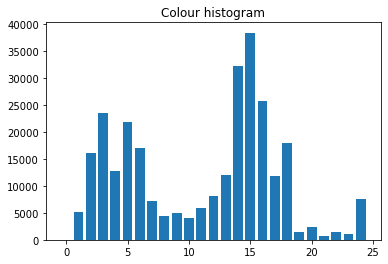

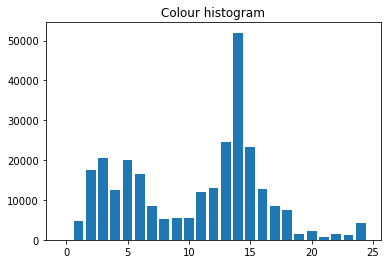

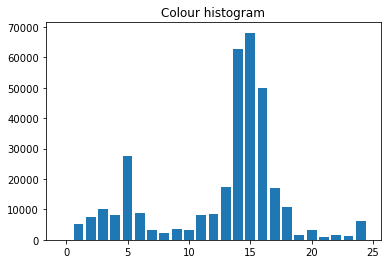

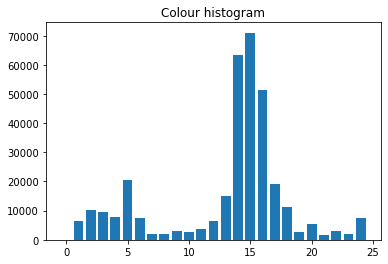

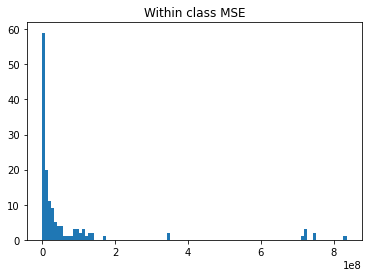

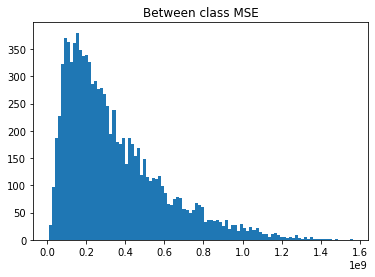

In [9]:
examplelist = [0,1,10,11]

for item in examplelist:
    plt.bar(np.arange(features[item].shape[0]), features[item])
    plt.title('Colour histogram')
    plt.show()

# find intra and inter errors
def mse(x, y):
    return np.mean(np.square(x-y))

within = []
between = []
n = len(features)
for k in range(10000):
    
    i = np.random.randint(0,n-1)
    j = np.random.randint(0,n-1)
    
    if (classes[i]==classes[j]):
        within.append(mse(features[i], features[j]))
    else:
        between.append(mse(features[i], features[j]))

plt.hist(np.array(within), bins=100)
plt.title('Within class MSE')
plt.show()
plt.hist(np.array(between), bins=100)
plt.title('Between class MSE')
plt.show()

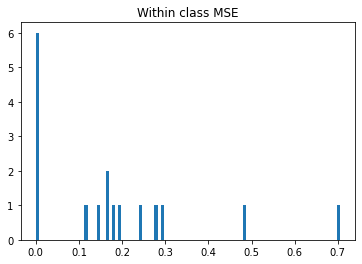

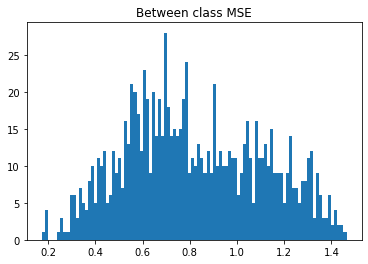

In [10]:
def cd(x, y):
    return np.arccos(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))

within = []
between = []
n = len(features)
for k in range(1000):
    
    i = np.random.randint(0,n-1)
    j = np.random.randint(0,n-1)
    
    if (classes[i]==classes[j]):
        within.append(cd(features[i], features[j]))
    else:
        between.append(cd(features[i], features[j]))

plt.hist(np.array(within), bins=100)
plt.title('Within class MSE')
plt.show()
plt.hist(np.array(between), bins=100)
plt.title('Between class MSE')
plt.show()

In [11]:
def k_nearest_neighbours(images, features, query_index, K=10):
    
    # calculate distance from image of class i to all others
    distances = []
    for i in range(0,len(features)):
        if (i!=query_index): # exclude itself
            distances.append(mse(features[query_index], features[i]))
            
    # sort by increasing distance and get the indices where these are
    indices = np.argsort(distances)
    
    closest_images = [images[k] for k in indices]
    closest_distances = [distances[k] for k in indices]

    # return K closest only
    return closest_images[:K], closest_distances[:K]

Reference image:


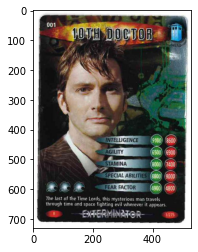

Closest images:


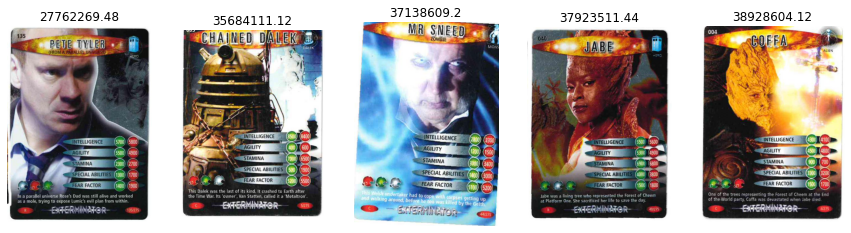

In [12]:
x=0
# calculate distance from image of class i to all others
closest_images, closest_distances = k_nearest_neighbours(images, features, x,100)

# display closest images and their distances. A lower distance is a closer match in this method.

print('Reference image:')
plt.imshow(images[x])
plt.show()
print('Closest images:')
fig = plt.figure(figsize=(15,15))
for j in range(0,5):
    plt.subplot(1,5,j+1)
    plt.imshow(closest_images[j])
    plt.title(str(closest_distances[j]))
    plt.axis('off')
plt.show()

New method created using a Scale Invariant Feature Transform method. 

In [13]:
from scipy import ndimage
def initial_image_processing(imageset,blurfactor=0,cropfactor=1):
    finalimages = []
    for image in imageset:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurry_image = cv2.GaussianBlur(image,(blurfactor,blurfactor),cv2.BORDER_DEFAULT)
        height,width = blurry_image.shape
        image = image[:int(height/cropfactor),]
        image = cv2.resize(image,(image.shape[1]//2,image.shape[0]//2))
        finalimages.append(image)
    return finalimages

In [14]:
slowimageset = initial_image_processing(images)
slowunknownimageset = initial_image_processing(unknown_images)
fastimageset = initial_image_processing(images,blurfactor=0,cropfactor=2)
fastunknownimageset = initial_image_processing(unknown_images,blurfactor=0,cropfactor=1)

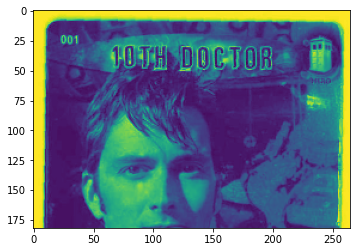

In [15]:
plt.imshow(fastimageset[0])

In [16]:
def SDAC(imgset):
    kplist = []
    deslist = []
    for i in range(len(imgset)):
        kp,des = sift.detectAndCompute(imgset[i],None)
        kplist.append(kp)
        deslist.append(des)
    return kplist,deslist

In [17]:
slowinfo = SDAC(slowimageset)
fastinfo = SDAC(fastimageset)

In [18]:
def fast_flanner(img1,info,scale=1):
    kplist,deslist = info
    img1 = cv2.resize(img1,(scale*img1.shape[1],scale*img1.shape[0]))
    kp1, des1 = sift.detectAndCompute(img1,None)
    countlist = []
    for j in range(len(kplist)):
        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks=50)   # or pass empty dictionary

        flann = cv2.FlannBasedMatcher(index_params,search_params) 

        matches = flann.knnMatch(des1,deslist[j],k=2) # find matches!
        # ratio test as per Lowe's paper
        count = 0
        for i,(m,n) in enumerate(matches):
            if m.distance < 0.7*n.distance:
                count+=1

        countlist.append(count)
    
    return countlist

In [19]:
def card_identifier(card,kplist,M,scale=1):
    countlist = np.array(fast_flanner(card,kplist,scale))
    card_index_list = []
    i = 0
    index_of_max = np.argpartition(countlist,-M)[-M::][::-1]
    while i < M:
        card_index_list.append(index_of_max[i])
        i+=1
    return card_index_list

In [20]:
# a = np.argpartition(test,-5)[-5::][::-1]

# print(a)

# for index in a:
#     print(test[index])

In [21]:
#testing

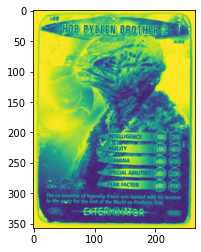

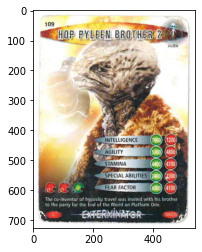

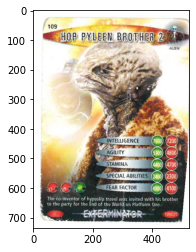

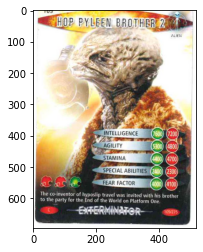

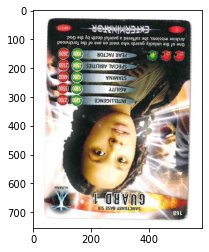

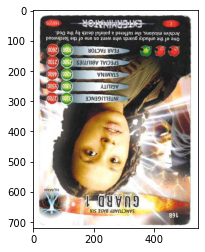

In [22]:
img = fastunknownimageset[8]
# img = img[:img.shape[0]//2:]
plt.imshow(img)
plt.show()

loi = card_identifier(img,fastinfo,5,3)

for index in loi:
    plt.imshow(images[index])
    plt.show()

In [23]:
unknown_classes = [61,157,173,80,15,39,172,197,109,114,189,61,168,138,10,151]

Different image sets show how image processing such as cropping and resizing can imrprove the speed of the card identification.

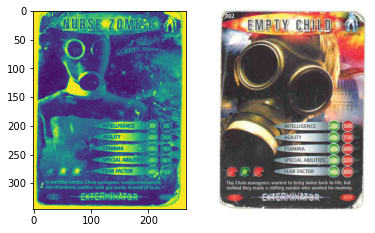

Predicted card ID: 2


KeyboardInterrupt: 

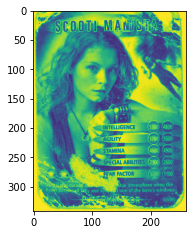

In [24]:
results = []

for im in slowunknownimageset:
    plt.subplot(1,2,1)
    plt.imshow(im)
    loi = card_identifier(im,slowinfo,1,3)
    index = loi[0]
    results.append(classes[index])
    plt.subplot(1,2,2)
    plt.imshow(images[index])
    plt.axis('off')
    plt.show()
    print('Predicted card ID: '+str(index))

In [ ]:
for im in slowimageset:
    plt.imshow(im)
    plt.show()
    loi = card_identifier(im,slowinfo,1,3)
    index = loi[0]
    results.append(classes[index])
    plt.imshow(images[index])
    plt.show()
    print('Predicted card ID: '+str(index))

In [ ]:
for im in fastimageset:
    plt.imshow(im)
    plt.show()
    loi = card_identifier(im,slowinfo,1,3)
    index = loi[0]
    results.append(classes[index])
    plt.imshow(images[index])
    plt.show()
    print('Predicted card ID: '+str(index))

In [ ]:
for im in slowimageset:
    plt.imshow(im)
    plt.show()
    loi = card_identifier(im,fastinfo,1,3)
    index = loi[0]
    results.append(classes[index])
    plt.imshow(images[index])
    plt.show()
    print('Predicted card ID: '+str(index))

In [ ]:
for im in fastimageset:
    plt.imshow(im)
    plt.show()
    loi = card_identifier(im,fastinfo,1,10)
    index = loi[0]
    results.append(classes[index])
    plt.imshow(images[index])
    plt.show()
    print('Predicted card ID: '+str(index))

Using cropping to increase speed. A resize factor of 0.1 provides accurate results at a much faster rate.

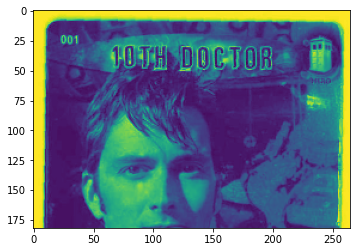

In [25]:
cropped_imageset = []

plt.imshow(fastimageset[0])
plt.show()

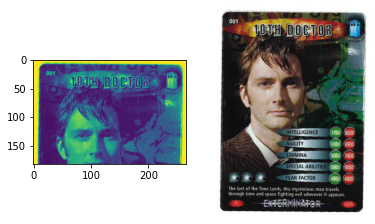

Predicted card ID: 1


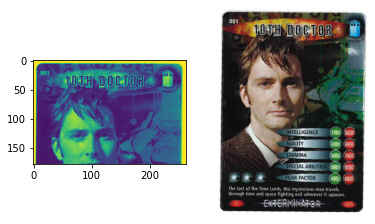

Predicted card ID: 1


KeyboardInterrupt: 

In [26]:
results = []

f=0.1

for im in fastimageset:
    plt.subplot(1,2,1)
    plt.imshow(im)
    im = cv2.resize(im,(0,0),fx=f,fy=f)
    loi = card_identifier(im,fastinfo,1,3)
    index = loi[0]
    results.append(classes[index])
    plt.subplot(1,2,2)
    plt.imshow(images[index])
    plt.axis('off')
    plt.show()
    print('Predicted card ID: '+str(classes[index]))